In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import seaborn as sns

In [2]:
data = pd.read_csv("data/knee_features.csv")
data = data.dropna().drop_duplicates().reindex()
data["LATERALITY"] = np.where(data["LATERALITY"] == "RIGHT", 0, 1)
data_x = data.drop(["ID", "TIMEPOINT", "KLG"], axis = 1)
data_y = data.KLG
data

,ID,TIMEPOINT,LATERALITY,LATCOV,MEDCOV,LATEXTR,MEDEXTR,MTCVOL,LTCVOL,MM_AREA,RATIO_MM,LM_AREA,RATIO_LM,FC_VOLUME,TC_VOLUME,MM_VOL,LM_VOL,KLG
0,9000099,v00,0,0.552836,0.240201,-1.288910,2.842620,1552.54,2408.74,1352.04,1.14,2300.80,0.77,14660.77,3961.29,1275.83,3122.21,2.0
1,9000296,v00,0,0.594802,0.500594,-0.110023,0.141658,2009.58,2170.92,2324.76,0.79,2048.56,0.75,14285.34,4180.50,3098.30,2873.69,2.0
2,9000622,v00,0,0.620763,0.506735,-0.722115,2.204600,1084.06,1139.15,1706.61,0.92,1768.13,0.89,8835.25,2223.21,1953.66,2103.00,1.0
3,9000798,v00,0,0.610871,0.449211,-0.138771,1.402580,2763.71,2641.91,2443.74,0.68,2424.60,0.67,19886.17,5405.62,3744.49,3763.75,1.0
4,9001104,v00,0,0.614401,0.508037,-0.640022,0.592623,1505.37,1527.42,1853.58,0.81,1835.04,0.76,11613.47,3032.79,2413.39,2524.95,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46982,9974824,v96,1,0.598080,0.481619,-1.355670,0.641773,1107.60,1472.43,1439.84,0.89,1489.80,0.85,8900.56,2574.83,1704.02,1837.26,0.0
46986,9979306,v96,1,0.610782,0.620314,-0.121162,0.144291,1401.44,1891.41,2108.00,0.80,1781.31,0.82,12218.63,3295.18,2919.00,2283.88,0.0
46989,9988820,v96,1,0.639981,0.493407,0.734016,1.386140,1245.12,1388.60,1594.28,0.84,2084.11,0.85,9814.17,2612.51,1956.45,2693.27,2.0
46990,9989309,v96,1,0.237709,0.481720,-5.070030,3.079690,1193.76,1162.87,1953.72,0.82,1827.46,1.32,11890.18,2358.31,2515.28,776.74,3.0


In [3]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_x)
scaled_data

array([[-0.963694  , -0.53038014, -2.96476338, ...,  0.11049522,
        -1.86741335,  0.88964763],
       [-0.963694  ,  0.01323191,  0.36357184, ...,  0.3102454 ,
         0.65186933,  0.5029816 ],
       [-0.963694  ,  0.34952111,  0.44206591, ..., -1.4732911 ,
        -0.9304183 , -0.6961156 ],
       ...,
       [ 1.03767378,  0.59846397,  0.27170783, ..., -1.11855023,
        -0.92656155,  0.22227066],
       [ 1.03767378, -4.61241883,  0.12232496, ..., -1.35018426,
        -0.15406558, -2.75961022],
       [ 1.03767378,  0.681147  ,  1.38685792, ...,  0.1050643 ,
         1.06434732,  0.3577718 ]])

In [4]:
pca = PCA()
pca.fit(scaled_data)
x_pca = pca.transform(scaled_data)
np.sum(pca.explained_variance_ratio_ * 100)

100.00000000000003

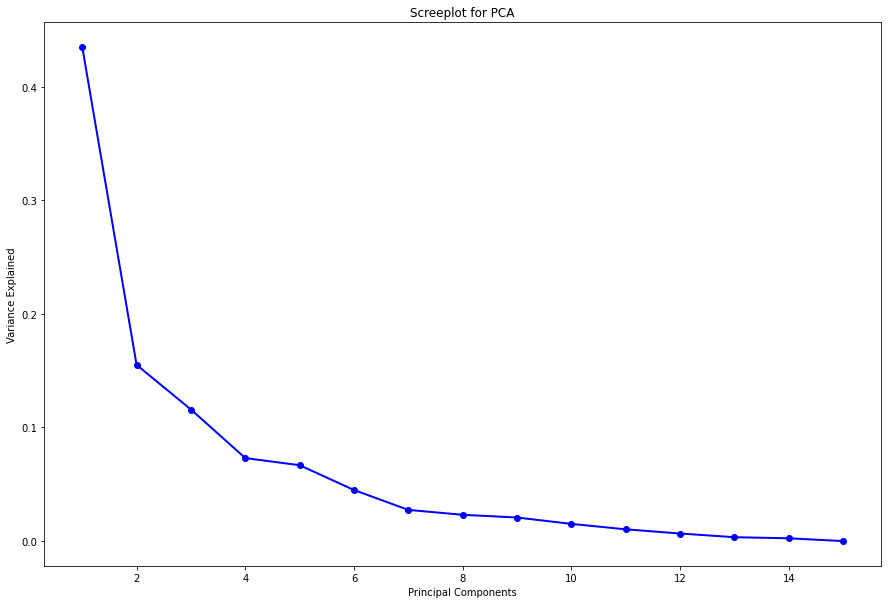

In [5]:
PC_values = np.arange(pca.n_components_) + 1
plt.figure(figsize=(15,10))
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Screeplot for PCA')
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained')
plt.show()

#### How many components do we want to keep?

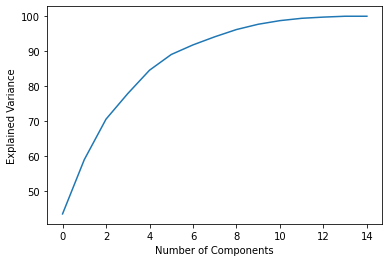

In [6]:
plt.plot(np.cumsum(pca.explained_variance_ratio_ * 100))
plt.xlabel("Number of Components")
plt.ylabel("Explained Variance")
plt.show()

In [7]:
pca_3 = PCA(n_components=3, random_state=2020)
x_pca_3 = pca_3.fit_transform(scaled_data)

#### 3 principal components for all the KLG levels that explains 70% of the varaibility

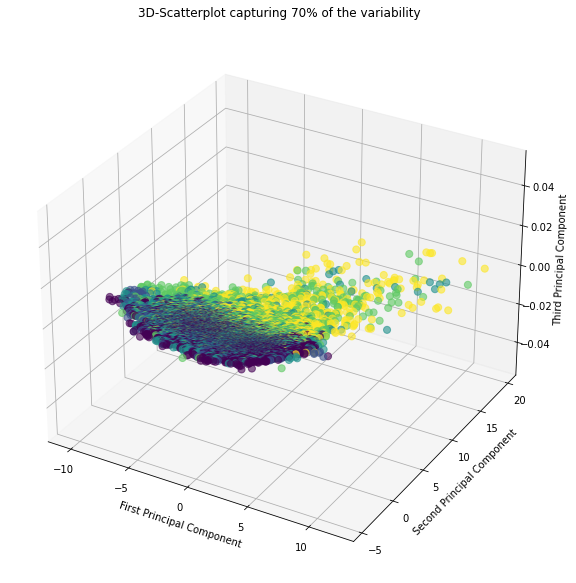

In [8]:
plt.figure(figsize=(12,10))
ax= plt.axes(projection = "3d")
scplt = ax.scatter3D(x_pca_3[:, 0] , x_pca_3[:, 1], c = data_y, s = 50, alpha = 0.6)
plt.title("3D-Scatterplot capturing 70% of the variability" , pad=15)
ax.set_xlabel("First Principal Component")
ax.set_ylabel("Second Principal Component")
ax.set_zlabel("Third Principal Component")
plt.show()